In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\train'
valid_path = 'C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\test' 

In [3]:
# Import the resnet 50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
 # useful for getting number of output classes
folders = glob('C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\train\*')

In [7]:
folders

['C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\train\\Myocardial infarction patients',
 'C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\train\\Normal patients',
 'C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\train\\Patients with abnormal heartbeat',
 'C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\train\\Patients with history of MI']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 928 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 448 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Davon\AppData\Local\Temp\ipykernel_3756\2154879028.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
29/29 [==============================] - 163s 6s/step - loss: 4.0555 - accuracy: 0.2931 - val_loss: 3.2913 - val_accuracy: 0.2656
Epoch 2/100
29/29 [==============================] - 140s 5s/step - loss: 1.6612 - accuracy: 0.3750 - val_loss: 2.3548 - val_accuracy: 0.3973
Epoch 3/100
29/29 [==============================] - 140s 5s/step - loss: 1.5095 - accuracy: 0.3987 - val_loss: 2.1064 - val_accuracy: 0.2812
Epoch 4/100
29/29 [==============================] - 138s 5s/step - loss: 1.2576 - accuracy: 0.4483 - val_loss: 1.3552 - val_accuracy: 0.4554
Epoch 5/100
29/29 [==============================] - 138s 5s/step - loss: 1.1837 - accuracy: 0.5032 - val_loss: 1.2754 - val_accuracy: 0.5089
Epoch 6/100
29/29 [==============================] - 137s 5s/step - loss: 1.4636 - accuracy: 0.4138 - val_loss: 3.3073 - val_accuracy: 0.2522
Epoch 7/100
29/29 [==============================] - 139s 5s/step - loss: 1.2691 - accuracy: 0.4677 - val_loss: 1.0914 - val_accuracy: 0.5804
Epoch 

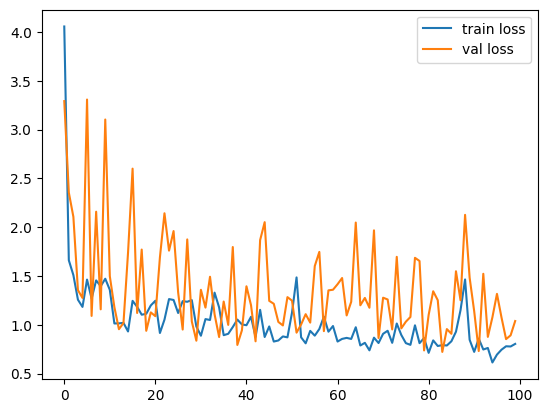

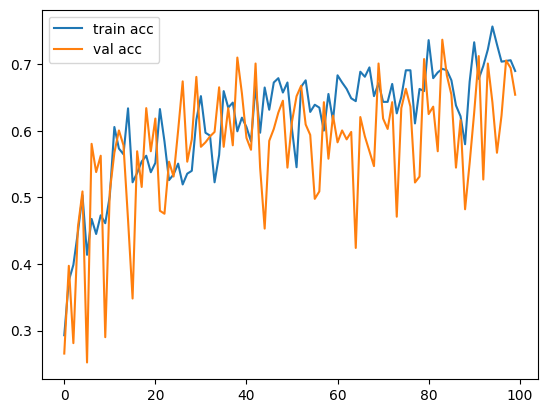

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [64]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [65]:
y_pred = model.predict(test_set)

14/14 [==============================] - 46s 3s/step


In [66]:
y_pred

array([[7.3404282e-02, 9.5396273e-02, 8.2769835e-01, 3.5010604e-03],
       [7.5696921e-03, 9.4931364e-01, 4.2162530e-02, 9.5406215e-04],
       [1.1485034e-01, 3.9947827e-04, 8.8101357e-01, 3.7366021e-03],
       ...,
       [2.6787726e-02, 8.0302739e-01, 5.7958718e-02, 1.1222612e-01],
       [1.1720343e-02, 9.0826803e-01, 7.9905257e-02, 1.0642522e-04],
       [2.8538835e-01, 1.0077132e-01, 1.5629306e-01, 4.5754719e-01]],
      dtype=float32)

In [67]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [68]:
y_pred

array([2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 3, 3, 2, 1, 1, 3,
       1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 0,
       2, 2, 3, 2, 3, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0,
       2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0,
       1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 3, 1, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 3, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 3,
       2, 1, 2, 3, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 3, 2, 0, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 1, 2, 3, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 0,
       2, 2, 2, 2, 2, 3, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1,
       1, 2, 1, 1, 0, 1, 1, 3, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 3,
       2, 2, 2, 1, 2, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0,

In [69]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [70]:
C:\Users\Davon\Desktop\CMR_image _classification\cardiovascular_ECG_images\test\Myocardial infarction patientsmodel=load_model('model_resnet50.h5')

In [71]:
#img_data

In [144]:
img=image.load_img('C:\\Users\\Davon\\Desktop\\CMR_image _classification\\cardiovascular_ECG_images\\test\\Myocardial infarction patients\\test (15).jpg',target_size=(224,224))

In [145]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [146]:
x.shape

(224, 224, 3)

In [147]:
x=x/255

In [148]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [153]:
model.predict(img_data)

1/1 [==============================] - 0s 121ms/step


array([[3.5212214e-08, 3.0689247e-21, 1.0000000e+00, 9.1153360e-09]],
      dtype=float32)

In [150]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 122ms/step


In [152]:
a

array([2], dtype=int64)